# Loading the Dataset

In [1116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew 


# df = pd.read_csv('dataset3.csv')
df = pd.read_csv('zillow_homes_sold_toronto_cordinations_added.csv')
# df = pd.read_csv('zillow_homes_sold_raleigh_cordinations_added.csv')

df.head()


,isShowcaseListing,longitude,timeOnZillow,zestimate,daysOnZillow,zpid,taxAssessedValue,isUnmappable,priceForHDP,dateSold,...,homeType,bathrooms,rentZestimate,price,city,streetAddress,country,currency,listing_sub_type,livingArea
0,False,-79.400083,6.205267e+10,NaN,718,2071870830,NaN,False,430000,1650524400000,...,CONDO,1.0,NaN,430000,Toronto,600 Fleet St #409,CAN,CAD,{},NaN
1,False,-79.419914,8.036947e+10,NaN,930,2068504642,NaN,False,1452000,1632207600000,...,SINGLE_FAMILY,1.0,NaN,1452000,Toronto,429 Montrose Ave,CAN,CAD,{},750.0
2,False,-79.400083,8.131987e+10,NaN,941,2071852833,NaN,False,430000,1631257200000,...,CONDO,1.0,NaN,430000,Toronto,600 Fleet St UNIT 232,CAN,CAD,{},NaN
3,False,-80.344809,8.563987e+10,NaN,991,2069940188,NaN,False,1300000,1626937200000,...,SINGLE_FAMILY,4.0,NaN,1300000,Cambridge,386 Salisbury Ave,CAN,CAD,{},NaN
4,False,-79.400083,6.205267e+10,NaN,718,2071870830,NaN,False,430000,1650524400000,...,CONDO,1.0,NaN,430000,Toronto,600 Fleet St #409,CAN,CAD,{},NaN


In [1117]:
# df['homeStatus'].value_counts()
df['homeStatusForHDP'].value_counts()

homeStatusForHDP
RECENTLY_SOLD    5042
FOR_RENT           98
FOR_SALE           80
Name: count, dtype: int64

In [1118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   isShowcaseListing        5220 non-null   bool   
 1   longitude                5220 non-null   float64
 2   timeOnZillow             5100 non-null   float64
 3   zestimate                54 non-null     float64
 4   daysOnZillow             5220 non-null   int64  
 5   zpid                     5220 non-null   int64  
 6   taxAssessedValue         54 non-null     float64
 7   isUnmappable             5220 non-null   bool   
 8   priceForHDP              5220 non-null   int64  
 9   dateSold                 5220 non-null   int64  
 10  state                    5220 non-null   object 
 11  isFeatured               5220 non-null   bool   
 12  isPremierBuilder         5220 non-null   bool   
 13  isPreforeclosureAuction  5220 non-null   bool   
 14  lotAreaValue            

In [1119]:
print(df.isnull().sum())

isShowcaseListing             0
longitude                     0
timeOnZillow                120
zestimate                  5166
daysOnZillow                  0
zpid                          0
taxAssessedValue           5166
isUnmappable                  0
priceForHDP                   0
dateSold                      0
state                         0
isFeatured                    0
isPremierBuilder              0
isPreforeclosureAuction       0
lotAreaValue               3230
isNonOwnerOccupied            0
homeStatus                    0
latitude                      0
lotAreaUnit                3230
bedrooms                      0
zipcode                       0
homeStatusForHDP              0
isZillowOwned                 0
shouldHighlight               0
homeType                      0
bathrooms                     0
rentZestimate              5165
price                         0
city                          0
streetAddress                 0
country                       0
currency

# Data Preprocessing and Clean up

## Removing columns
Columns like state, homeStatus, lotAreaUnit, homeType, city, streetAddress, country, and currency are categorical and should be encoded to numerical values if you plan to use them in your model.


In [1120]:
columns_with_many_missing = df.columns[df.isnull().mean() > .99]

columns_with_low_predictive_power = [
    'zpid', 'streetAddress', 'listing_sub_type', 
    'isUnmappable', 'isShowcaseListing', 'isFeatured', 
    'isPremierBuilder', 'isPreforeclosureAuction', 
    'isNonOwnerOccupied', 'isZillowOwned', 'shouldHighlight',
    'city', 'streetAddress', 'country', 'currency', 'zpid', 'lotAreaUnit',
    'homeStatusForHDP', 'homeStatus', 'state',
     'zestimate', 'taxAssessedValue', 'rentZestimate',
     'zipcode',
     'dateSold',
     'priceForHDP',
    #  'daysOnZillow'
]

columns_to_drop = list(set(columns_with_many_missing.to_list() + columns_with_low_predictive_power))

df_dropped = df.drop(columns=columns_to_drop)

print(f"Number of rows: {df.shape[0]}")
print("columns_with_many_missing:", columns_with_many_missing)
print("Columns dropped:", columns_to_drop)
print("\nRemaining columns:", df_dropped.columns.tolist())

df_dropped.head()
df = df_dropped


Number of rows: 5220
columns_with_many_missing: Index([], dtype='object')
Columns dropped: ['isZillowOwned', 'priceForHDP', 'state', 'shouldHighlight', 'homeStatusForHDP', 'country', 'listing_sub_type', 'isShowcaseListing', 'rentZestimate', 'homeStatus', 'currency', 'isFeatured', 'isPreforeclosureAuction', 'zipcode', 'streetAddress', 'lotAreaUnit', 'isNonOwnerOccupied', 'taxAssessedValue', 'isPremierBuilder', 'city', 'isUnmappable', 'zestimate', 'zpid', 'dateSold']

Remaining columns: ['longitude', 'timeOnZillow', 'daysOnZillow', 'lotAreaValue', 'latitude', 'bedrooms', 'homeType', 'bathrooms', 'price', 'livingArea']


## Categorical Data Encoding
Since homeType is a categorical variable, we'll need to encode it to use it in most machine learning models, which require numerical input.

One-Hot Encoding: This method converts the categorical variable into a series of binary columns, each representing a unique category. One-hot encoding is suitable when there is no ordinal relationship between the categories. Since homeType likely does not have a natural order, this method is appropriate.

In [1121]:
df['homeType'].value_counts()

homeType
SINGLE_FAMILY    3577
CONDO             905
APARTMENT         461
TOWNHOUSE         222
MULTI_FAMILY       55
Name: count, dtype: int64

## Handling Sparse Categories
Given the distribution of your homeType categories, it appears that MANUFACTURED, MULTI_FAMILY, and TOWNHOUSE categories are relatively sparse compared to the others. To clean up the homeType column and ensure your model remains robust, you could group these less frequent categories into an "Other" category. This approach simplifies your model while retaining the information these categories provide.


In [1122]:
print(df.columns)
# print(type(df))
# df['homeType'] = df['homeType'].replace(['MANUFACTURED', 'MULTI_FAMILY', 'TOWNHOUSE'], 'Other')

# print("\nNew distribution of 'homeType':")
# print(df['homeType'].value_counts())
# print(type(df))



Index(['longitude', 'timeOnZillow', 'daysOnZillow', 'lotAreaValue', 'latitude',
       'bedrooms', 'homeType', 'bathrooms', 'price', 'livingArea'],
      dtype='object')


In [1123]:

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initializing the OneHotEncoder without specifying 'sparse'
encoder = OneHotEncoder(drop='first')  # Assuming 'drop' argument is supported in your version

# Fit and transform 'homeType' column
homeType_encoded_sparse = encoder.fit_transform(df[['homeType']])

# Convert the sparse matrix to a dense matrix and then to a DataFrame
homeType_encoded_df = pd.DataFrame(homeType_encoded_sparse.toarray(), columns=encoder.get_feature_names_out(['homeType']))

# Concatenate the encoded DataFrame back with the original DataFrame (excluding the original 'homeType' column)
df_final = pd.concat([df.drop('homeType', axis=1), homeType_encoded_df], axis=1)
df_final.columns
df = df_final
print(f"Number of rows: {df.shape[0]}")
df.head()


Number of rows: 5220


,longitude,timeOnZillow,daysOnZillow,lotAreaValue,latitude,bedrooms,bathrooms,price,livingArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,-79.400083,6.205267e+10,718,NaN,43.636951,0,1.0,430000,NaN,1.0,0.0,0.0,0.0
1,-79.419914,8.036947e+10,930,NaN,43.661144,0,1.0,1452000,750.0,0.0,0.0,1.0,0.0
2,-79.400083,8.131987e+10,941,NaN,43.636951,0,1.0,430000,NaN,1.0,0.0,0.0,0.0
3,-80.344809,8.563987e+10,991,NaN,43.355007,0,4.0,1300000,NaN,0.0,0.0,1.0,0.0
4,-79.400083,6.205267e+10,718,NaN,43.636951,0,1.0,430000,NaN,1.0,0.0,0.0,0.0


## Removing duplicates

In [1124]:
# Check for duplicate rows
print("Duplicates before:", df.duplicated().sum())

# Remove duplicate rows
df_removed = df.drop_duplicates()

# Check again to confirm removal
print("Duplicates after:", df_removed.duplicated().sum())

print("Number of rows:", len(df_removed))
df_removed.head()
df = df_removed
print(f"Number of rows: {df.shape[0]}")



Duplicates before: 857
Duplicates after: 0
Number of rows: 4363
Number of rows: 4363


## Remove where price is 0

In [1125]:
# print((df['price'] == 0).sum())
# print((df['priceForHDP'] == 0).sum())
# print(((df['price'] == 0) & (df['priceForHDP'] != 0)).sum())
# df = df[df['price'] != 0]
# print('------------')
# print((df['price'] == 0).sum())
# print((df['priceForHDP'] == 0).sum())
# print(((df['price'] == 0) & (df['priceForHDP'] != 0)).sum())

# num_rows = df.shape[0]
# print(f"Number of rows: {num_rows}")


# Exploratory Data Analysis (EDA) 

## Describe

In [1126]:
# display basic descriptive statistics for numerical columns
print(df.describe())
print(f"Number of rows: {df.shape[0]}")

df.head()


         longitude  timeOnZillow  daysOnZillow  lotAreaValue     latitude  \
count  4363.000000  4.357000e+03   4363.000000   1496.000000  4363.000000   
mean    -79.427185  6.187088e+10    714.909008   3913.129733    43.765770   
std       0.475105  1.791425e+10    208.894836   2488.899417     0.287262   
min     -81.625465  2.004717e+09     -1.000000      0.000000    42.755335   
25%     -79.581393  5.298072e+10    609.000000   2330.000000    43.649795   
50%     -79.398212  6.222551e+10    720.000000   3234.000000    43.704316   
75%     -79.316389  7.458072e+10    859.500000   5445.000000    43.790941   
max     -77.059010  9.462557e+10   1095.000000  10419.000000    46.104149   

          bedrooms    bathrooms         price   livingArea  homeType_CONDO  \
count  4363.000000  4363.000000  4.363000e+03   908.000000     4363.000000   
mean      3.316755     2.675338  1.402629e+06  2190.943833        0.203071   
std       1.664849     1.339355  8.614329e+05  1090.422818        0.4023

,longitude,timeOnZillow,daysOnZillow,lotAreaValue,latitude,bedrooms,bathrooms,price,livingArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,-79.400083,6.205267e+10,718,NaN,43.636951,0,1.0,430000,NaN,1.0,0.0,0.0,0.0
1,-79.419914,8.036947e+10,930,NaN,43.661144,0,1.0,1452000,750.0,0.0,0.0,1.0,0.0
2,-79.400083,8.131987e+10,941,NaN,43.636951,0,1.0,430000,NaN,1.0,0.0,0.0,0.0
3,-80.344809,8.563987e+10,991,NaN,43.355007,0,4.0,1300000,NaN,0.0,0.0,1.0,0.0
4,-79.400083,6.205267e+10,718,NaN,43.636951,0,1.0,430000,NaN,1.0,0.0,0.0,0.0


## Coorelation Matrix

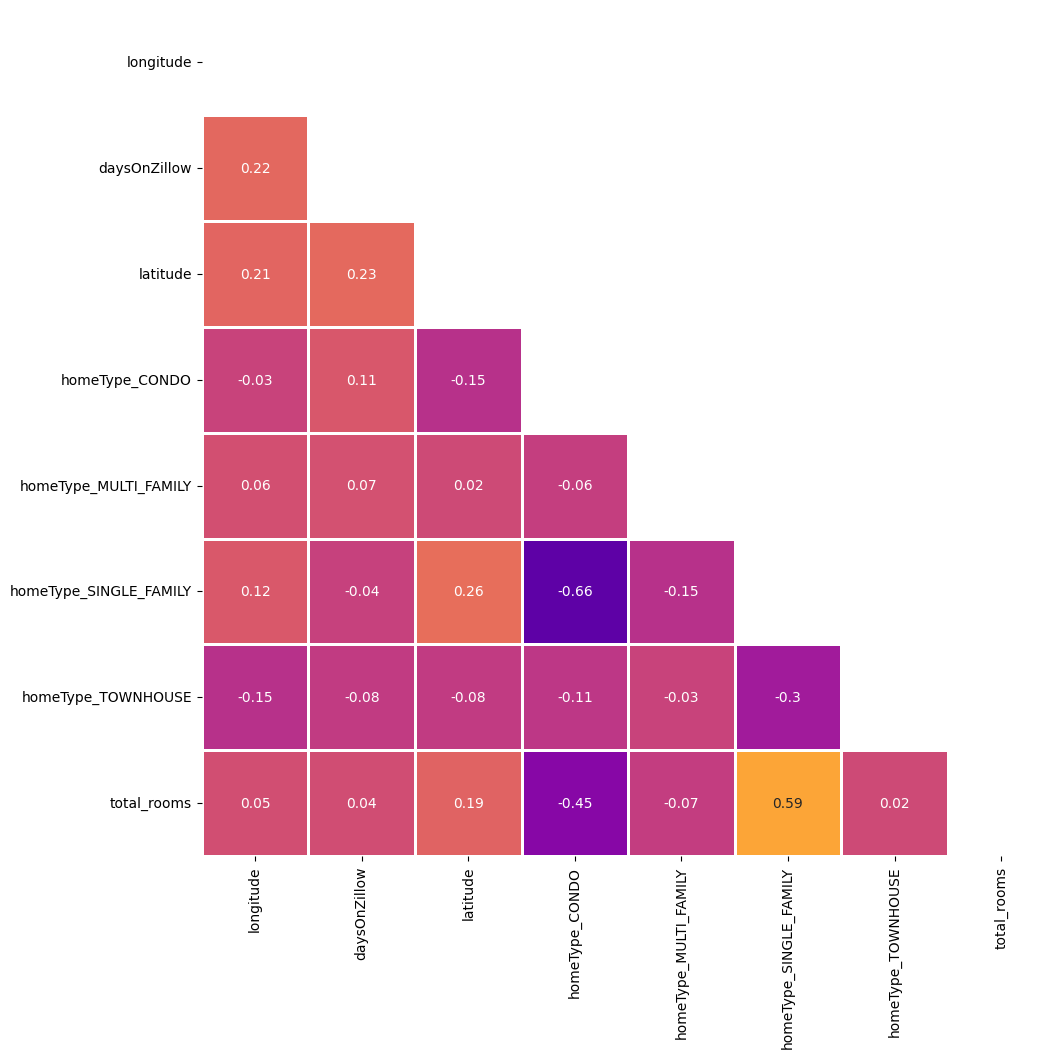

In [1127]:
# this function is adopted from https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction/notebook
def corrMat(df,id=False):
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(11,11))
    # mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
corrMat(X_train)

bathrooms have a strong positive correlation with bedrooms (0.66), which is expected since more bedrooms often mean more bathrooms.
based on this we create a 'Total Rooms' Feature: Since bathrooms and bedrooms are highly correlated, we create a new feature that combines them, such as total_rooms = bathrooms + bedrooms. This could help the model by consolidating two highly correlated features into one.

## Add bedrooms+bathrooms

In [1128]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df = df.drop(['bedrooms', 'bathrooms'], axis=1)
df.head()

/var/folders/fy/x9y5w78j2x743gf22kp9g4cm0000gn/T/ipykernel_88690/3728038067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_rooms'] = df['bedrooms'] + df['bathrooms']


,longitude,timeOnZillow,daysOnZillow,lotAreaValue,latitude,price,livingArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,total_rooms
0,-79.400083,6.205267e+10,718,NaN,43.636951,430000,NaN,1.0,0.0,0.0,0.0,1.0
1,-79.419914,8.036947e+10,930,NaN,43.661144,1452000,750.0,0.0,0.0,1.0,0.0,1.0
2,-79.400083,8.131987e+10,941,NaN,43.636951,430000,NaN,1.0,0.0,0.0,0.0,1.0
3,-80.344809,8.563987e+10,991,NaN,43.355007,1300000,NaN,0.0,0.0,1.0,0.0,4.0
4,-79.400083,6.205267e+10,718,NaN,43.636951,430000,NaN,1.0,0.0,0.0,0.0,1.0


## remove nan

In [1129]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

print("Categorical columns:"+ str(categorical_columns))

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")
    
print(f"Number of rows: {df.shape[0]}")
df.head()


Categorical columns:Index([], dtype='object')
Number of rows: 4363


,longitude,timeOnZillow,daysOnZillow,lotAreaValue,latitude,price,livingArea,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,total_rooms
0,-79.400083,6.205267e+10,718,NaN,43.636951,430000,NaN,1.0,0.0,0.0,0.0,1.0
1,-79.419914,8.036947e+10,930,NaN,43.661144,1452000,750.0,0.0,0.0,1.0,0.0,1.0
2,-79.400083,8.131987e+10,941,NaN,43.636951,430000,NaN,1.0,0.0,0.0,0.0,1.0
3,-80.344809,8.563987e+10,991,NaN,43.355007,1300000,NaN,0.0,0.0,1.0,0.0,4.0
4,-79.400083,6.205267e+10,718,NaN,43.636951,430000,NaN,1.0,0.0,0.0,0.0,1.0


In [1130]:
print(df.columns[df.isna().any()].tolist())

nan_cols = df.columns[df.isna().any()].tolist()

df = df[df['price'].notna()]
# df = df[df['bedrooms'].notna() & df['bathrooms'].notna()]
# df = df[df['livingArea'].notna()]

for col in nan_cols:
    print(f"{col}: {df[col].isna().sum()}")

# Count columns with NaN values
nan_cols_count = df.columns[df.isna().any()].shape[0]
print(f"Number of columns with NaN values: {nan_cols_count}")

# Remove columns with NaN values
df = df.dropna(axis=1)
print(f"Number of columns with NaN values: {nan_cols_count}")

print(f"Number of rows: {df.shape[0]}")
# print((df['bedrooms'] == 0).sum())
# df = df[df['bedrooms'] != 0]


print(f"Number of rows: {df.shape[0]}")
df.head()



['timeOnZillow', 'lotAreaValue', 'livingArea']
timeOnZillow: 6
lotAreaValue: 2867
livingArea: 3455
Number of columns with NaN values: 3
Number of columns with NaN values: 3
Number of rows: 4363
Number of rows: 4363


,longitude,daysOnZillow,latitude,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,total_rooms
0,-79.400083,718,43.636951,430000,1.0,0.0,0.0,0.0,1.0
1,-79.419914,930,43.661144,1452000,0.0,0.0,1.0,0.0,1.0
2,-79.400083,941,43.636951,430000,1.0,0.0,0.0,0.0,1.0
3,-80.344809,991,43.355007,1300000,0.0,0.0,1.0,0.0,4.0
4,-79.400083,718,43.636951,430000,1.0,0.0,0.0,0.0,1.0


# Training the Model
Implementing a Linear Regression model and split the data into training and testing sets

In [1131]:
# Final columns before training
print(f"Number of rows: {df.shape[0]}")

df.head()
# df.to_csv('training_dataset_saved.csv', index=False)

Number of rows: 4363


,longitude,daysOnZillow,latitude,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,total_rooms
0,-79.400083,718,43.636951,430000,1.0,0.0,0.0,0.0,1.0
1,-79.419914,930,43.661144,1452000,0.0,0.0,1.0,0.0,1.0
2,-79.400083,941,43.636951,430000,1.0,0.0,0.0,0.0,1.0
3,-80.344809,991,43.355007,1300000,0.0,0.0,1.0,0.0,4.0
4,-79.400083,718,43.636951,430000,1.0,0.0,0.0,0.0,1.0


## Linear Regression

In [1132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop('price', axis=1)
y = df['price']


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)



### Evaluation 

In [1133]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f"R-squared (R2) on Test Set: {r_squared}")

Root Mean Squared Error (RMSE) on Test Set: 666110.8385600615
R-squared (R2) on Test Set: 0.35450208646839176


## Random Forest

In [1134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest 
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees

random_forest_model.fit(X_train_scaled, y_train)

y_pred = random_forest_model.predict(X_test_scaled)


### Evaluation

In [1135]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f"R-squared (R2) on Test Set: {r_squared}")

Root Mean Squared Error (RMSE) on Test Set: 74350.92356764115
R-squared (R2) on Test Set: 0.991957805405347
